In [2]:
import numpy as np
import pandas
import seaborn
import matplotlib.pyplot as plot
import copy

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def create_frame():
    frame = pandas.read_csv("data.csv")
    frame.isnull().any()
    return(frame)

frame = create_frame()
frame.dropna(inplace=True)
frame.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
frame["Gender"]=preprocessing.LabelEncoder().fit_transform(frame["Gender"])

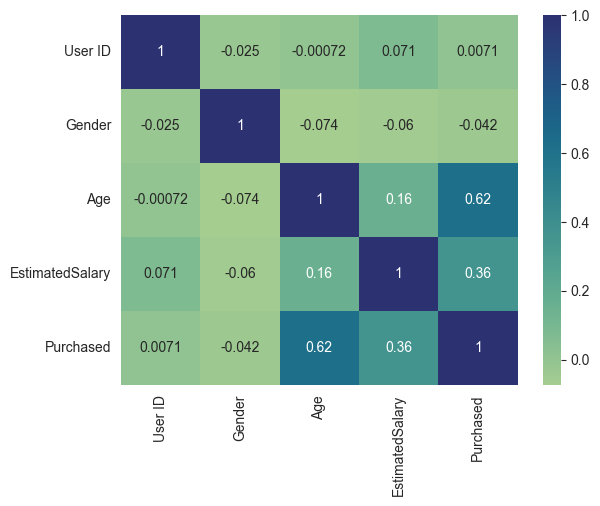

In [4]:
seaborn.set_style("whitegrid", {'axes.grid' : False})
seaborn.heatmap(frame.corr(), cmap="crest", annot=True)
plot.show()

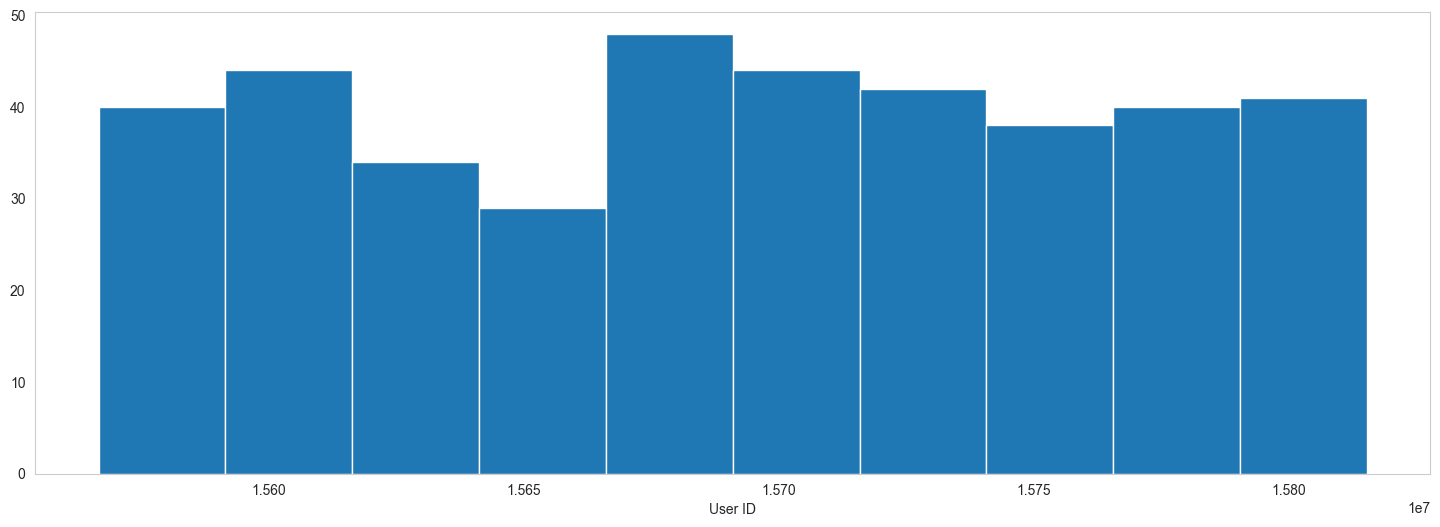

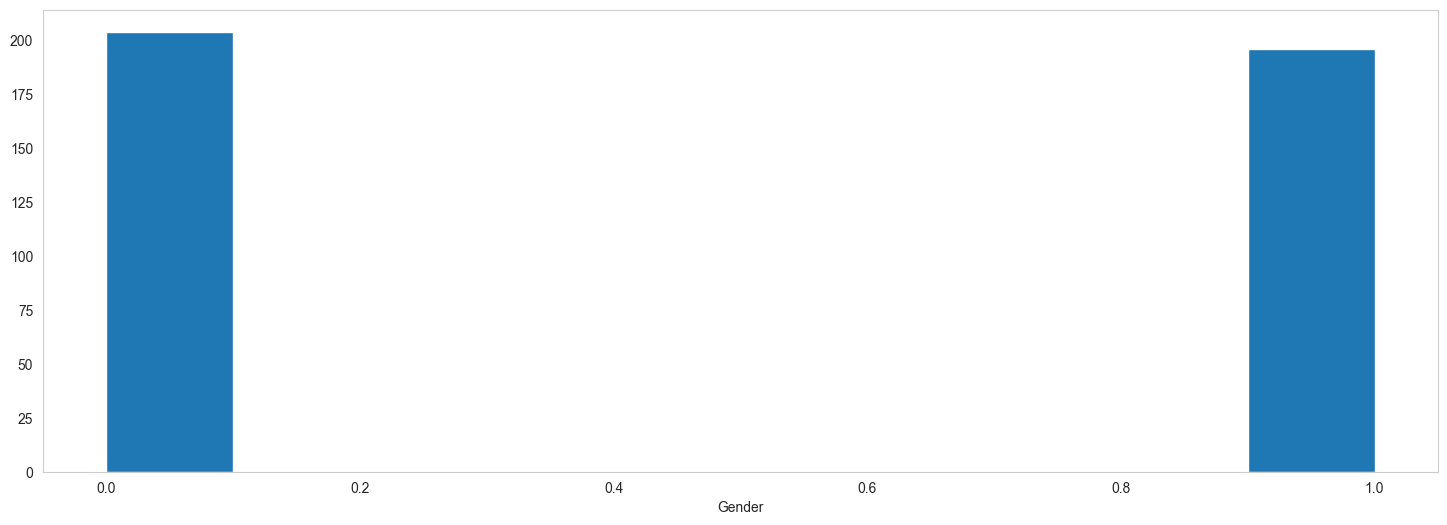

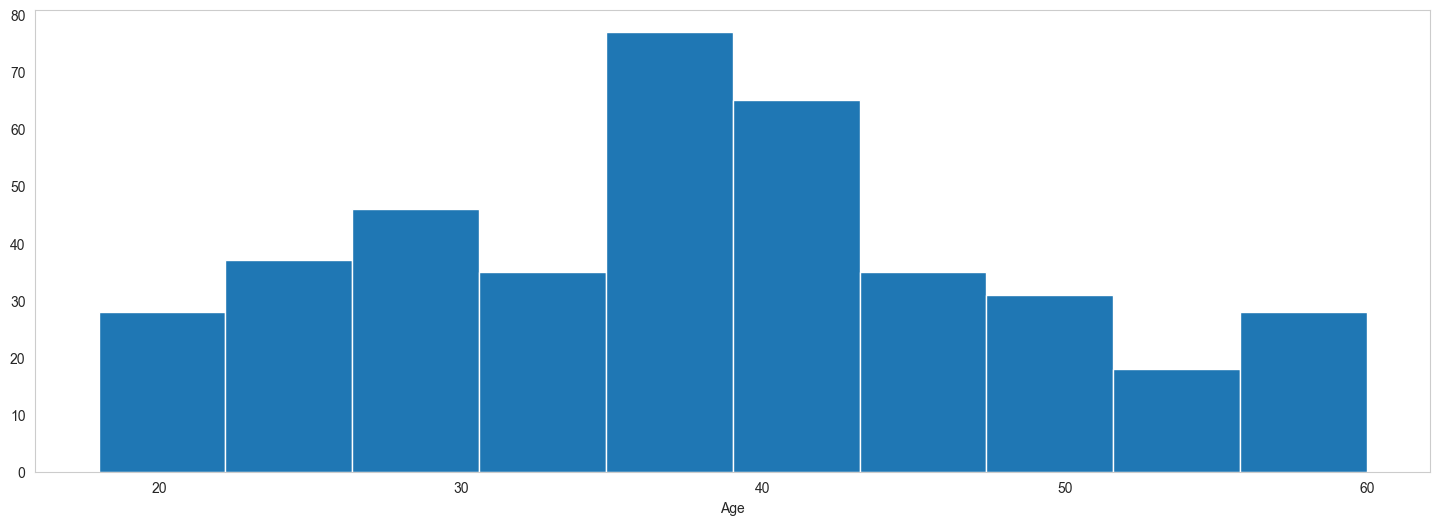

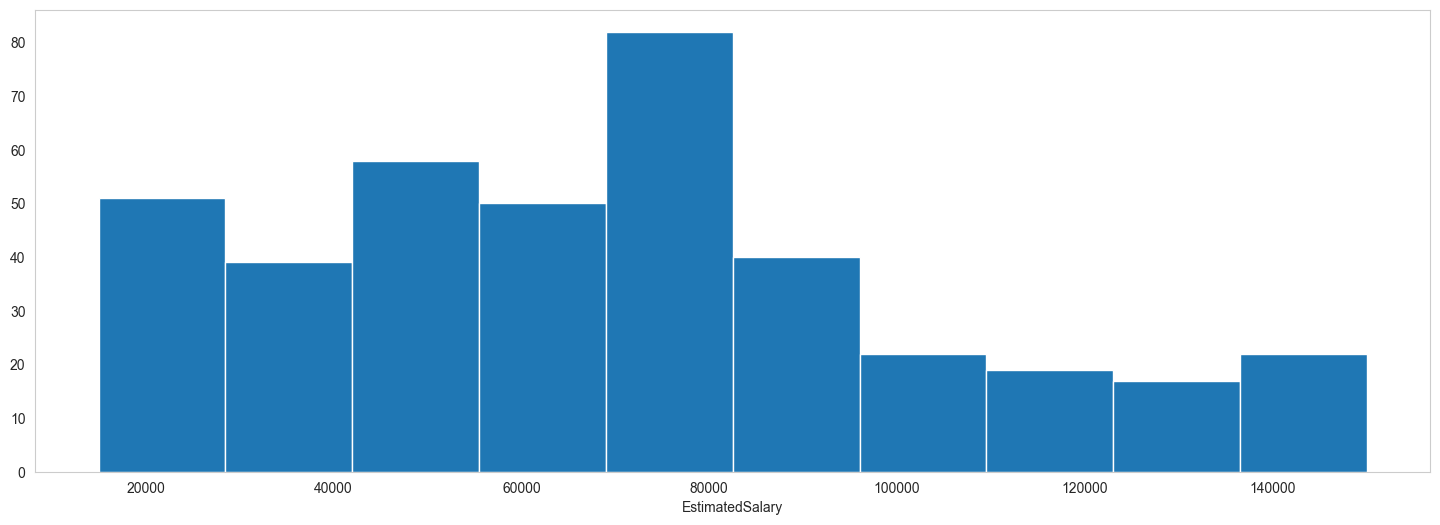

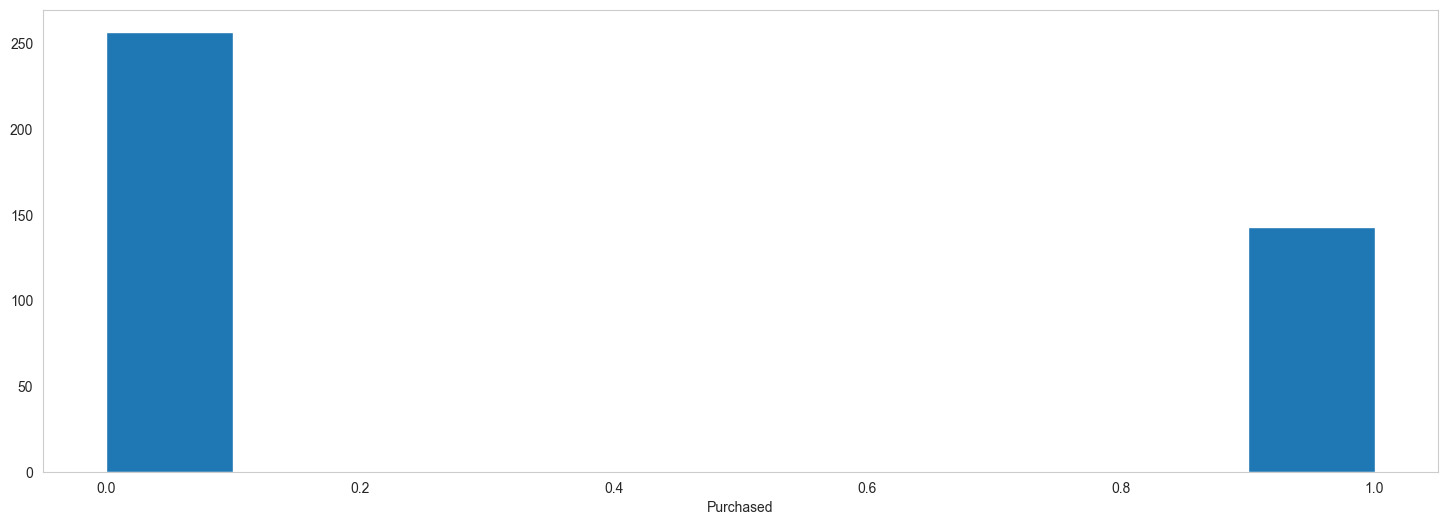

In [5]:
for i in range(1,len(frame.columns)):
    plot.figure(figsize=(18,6))
    plot.hist(frame[frame.columns[i]])
    plot.xlabel(frame.columns[i])
    plot.show()

<AxesSubplot: xlabel='Purchased', ylabel='EstimatedSalary'>

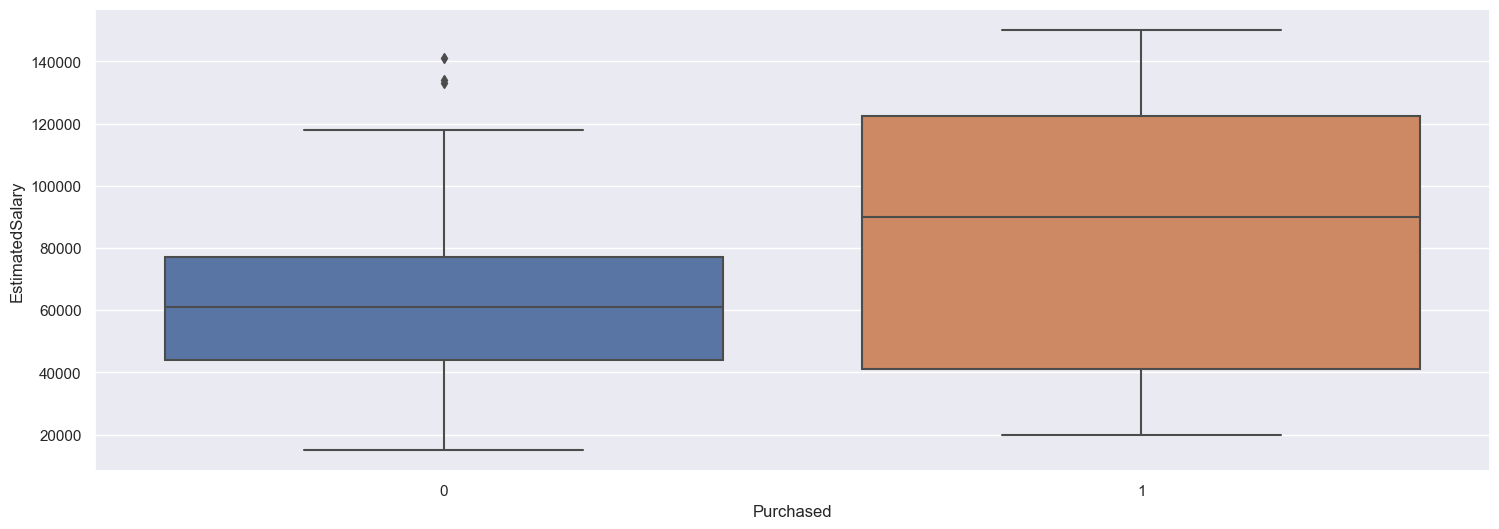

In [6]:
seaborn.set(rc={'figure.figsize':(18,6)})
seaborn.boxplot(x ='Purchased', y = 'EstimatedSalary', data = frame)

<AxesSubplot: xlabel='Purchased', ylabel='Age'>

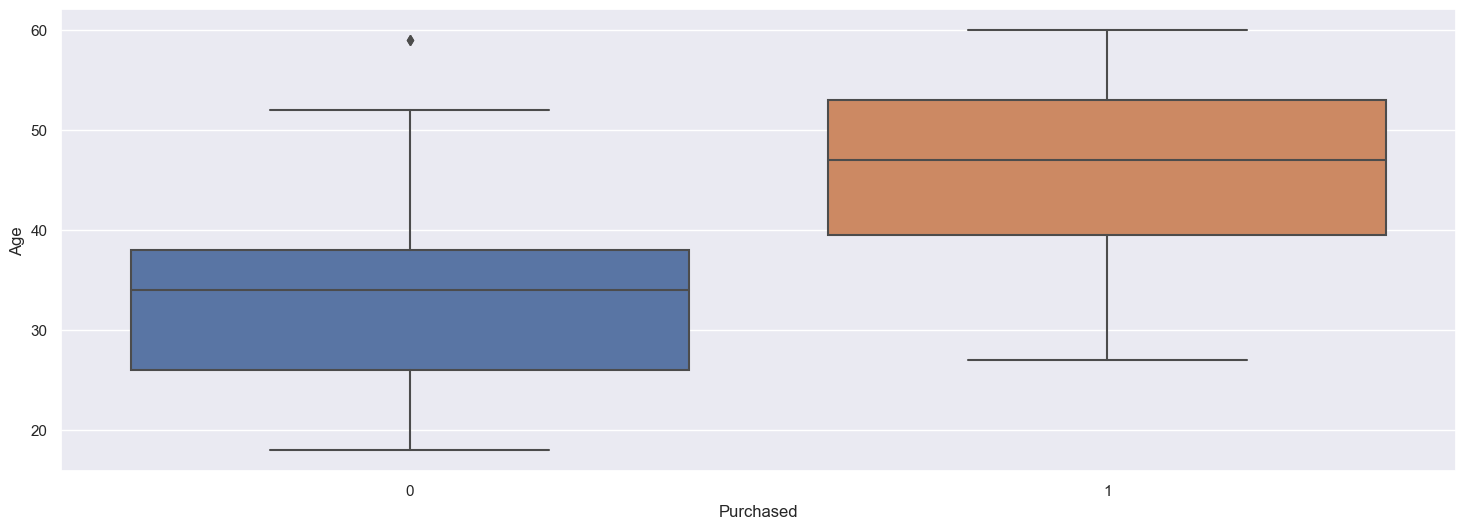

In [7]:
seaborn.set(rc={'figure.figsize':(18,6)})
seaborn.boxplot(x ='Purchased', y = 'Age', data = frame)

In [8]:
frame2 = frame.drop('User ID', axis=1)
data_normal = preprocessing.normalize(frame.drop('User ID', axis=1), axis=0)
frame_normal = pandas.DataFrame(data_normal, columns=frame2.columns)
a = frame_normal.drop('Purchased', axis=1)
b = frame2['Purchased']
print(a.head())


     Gender       Age  EstimatedSalary
0  0.071429  0.024307         0.012240
1  0.071429  0.044776         0.012885
2  0.000000  0.033262         0.027702
3  0.000000  0.034541         0.036721
4  0.071429  0.024307         0.048961


Метод Найближчих Сусідів

In [9]:
a_train, a_test, b_train, b_test = train_test_split(a, b, train_size=0.5, random_state=0)

In [10]:
k = list(range(2,30))
knn_classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': k,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}
grid = GridSearchCV(knn_classifier, param_grid).fit(a_train, b_train)
b_pred = grid.predict(a_test)
accuracy = accuracy_score(b_test, b_pred)
print("Точність: ", accuracy)
print(classification_report(b_test, b_pred)) 
print("Матриця неточності:")
print(confusion_matrix(b_test, b_pred)) 

Точність:  0.9
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       123
           1       0.88      0.86      0.87        77

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200

Матриця неточності:
[[114   9]
 [ 11  66]]


Дерево Рішень

In [11]:
tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_classifier.fit(a_train, b_train)
b_pred = tree_classifier.predict(a_test)
accuracy = accuracy_score(b_test, b_pred)
print("Точність: ", accuracy)
print(classification_report(b_test, b_pred)) 
print("Матриця неточності:")
print(confusion_matrix(b_test, b_pred)) 

Точність:  0.85
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       123
           1       0.86      0.73      0.79        77

    accuracy                           0.85       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.85      0.85      0.85       200

Матриця неточності:
[[114   9]
 [ 21  56]]


In [12]:
plot.figure(figsize=(16,8))
plot.figure(dpi=1200)
plot_tree(tree_classifier, filled = True)
plot.show()

<Figure size 1600x800 with 0 Axes>

Метод опорних векторів

In [13]:
svc_classifier = SVC()
param_grid = [
  {'C': [1, 10], 'gamma': [0.001, 0.0005],'kernel': ['linear']},
  {'C': [0.5, 1, 1.2, 10, 100], 'gamma': [0.001, 0.0005, 0.00011, 0.0001, 0.000099, 0.00001], 'kernel': ['rbf']},
  {'C': [1, 10], 'kernel': ['poly']},
  {'C': [1, 10], 'gamma': [0.001, 0.0005], 'kernel': ['sigmoid']}
]
grid = GridSearchCV(svc_classifier, param_grid).fit(a_train, b_train)
b_pred = grid.predict(a_test)
accuracy = accuracy_score(b_test, b_pred)
print("Точність: ", accuracy)
print(classification_report(b_test, b_pred))
print("Матриця неточності:")
print(confusion_matrix(b_test, b_pred)) 

Точність:  0.895
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       123
           1       0.90      0.82      0.86        77

    accuracy                           0.90       200
   macro avg       0.90      0.88      0.89       200
weighted avg       0.90      0.90      0.89       200

Матриця неточності:
[[116   7]
 [ 14  63]]


Метод random forest

In [14]:
accuracy = 0
trees_count = 0
for i in range(2, 60):
    forest = RandomForestClassifier (criterion='entropy', n_estimators = i)
    forest.fit(a_train, b_train) 
    b_pred_tree = forest.predict(a_test)
    print ('Кількість дерев: ', i)
    accuracy_actual = accuracy_score(b_test, b_pred_tree)
    print("Точність: ", accuracy_actual)
    if (accuracy_actual > accuracy):
        accuracy = accuracy_actual
        trees_count = i
        b_pred = copy.deepcopy(b_pred_tree)

Кількість дерев:  2
Точність:  0.83
Кількість дерев:  3
Точність:  0.82
Кількість дерев:  4
Точність:  0.85
Кількість дерев:  5
Точність:  0.895
Кількість дерев:  6
Точність:  0.855
Кількість дерев:  7
Точність:  0.87
Кількість дерев:  8
Точність:  0.85
Кількість дерев:  9
Точність:  0.89
Кількість дерев:  10
Точність:  0.865
Кількість дерев:  11
Точність:  0.87
Кількість дерев:  12
Точність:  0.875
Кількість дерев:  13
Точність:  0.87
Кількість дерев:  14
Точність:  0.855
Кількість дерев:  15
Точність:  0.89
Кількість дерев:  16
Точність:  0.86
Кількість дерев:  17
Точність:  0.885
Кількість дерев:  18
Точність:  0.865
Кількість дерев:  19
Точність:  0.875
Кількість дерев:  20
Точність:  0.855
Кількість дерев:  21
Точність:  0.88
Кількість дерев:  22
Точність:  0.875
Кількість дерев:  23
Точність:  0.875
Кількість дерев:  24
Точність:  0.89
Кількість дерев:  25
Точність:  0.865
Кількість дерев:  26
Точність:  0.865
Кількість дерев:  27
Точність:  0.87
Кількість дерев:  28
Точність:  0

In [15]:
print("Найкраща точність: " + str(accuracy_score(b_test, b_pred)) + " при " + str(trees_count) + " дерев")
print(classification_report(b_test, b_pred)) 
print("Матриця неточності:")
print(confusion_matrix(b_test, b_pred)) 

Найкраща точність: 0.895 при 5 дерев
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       123
           1       0.87      0.86      0.86        77

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200

Матриця неточності:
[[113  10]
 [ 11  66]]


Метод AdaBoost

In [16]:
ada_classifier = AdaBoostClassifier()
ada_classifier = ada_classifier.fit(a_train, b_train)
b_pred = grid.predict(a_test)
accuracy = accuracy_score(b_test, b_pred)
print("Точність: ", accuracy)
print(classification_report(b_test, b_pred))
print("Матриця неточності:")
print(confusion_matrix(b_test, b_pred)) 

Точність:  0.895
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       123
           1       0.90      0.82      0.86        77

    accuracy                           0.90       200
   macro avg       0.90      0.88      0.89       200
weighted avg       0.90      0.90      0.89       200

Матриця неточності:
[[116   7]
 [ 14  63]]


Висновок.
В ході лабораторної роботи було проведено ознайомлення з елементарними лінійними класифікаторами, та проведено порівняння їх за рівнем точності на прикладі датасету Ad Click Prediction (https://www.kaggle.com/datasets/jahnveenarang/cvdcvd-vd) Як видно з отриманих точності, матриць неточності та дерева рішень між ознаками та цільовою змінною є залежність. Це цілком логічно тому що ознаки відображають основні характеристики юзера, а цільова ознака є конверсією.